# This notebooks demonstrates a SIR model on a graph 

In [1]:
import sys

# add torchdiffeq to paths 
ODE_PATH = '/home/wwj/Repo/projects/torchdiffeq/'
sys.path.insert(0, ODE_PATH)
DEVICE = 'cpu'

from torchdiffeq import odeint_adjoint as odeint

import torch  
from itertools import repeat
import matplotlib.pyplot as plt

from model import *

# Basic model description

In [2]:
# number of nodes (cities)
N = 3

intra_b = torch.Tensor([0.1, 0.1, 0.1])  # intra_city transmission probability, each city can have a different values, 
                                         # it depends on how crowded the city is 
intra_k = torch.Tensor([0.1, 0.1, 0.1])  # intra_city recovering probability, each city can have a different values, 
                                         # it depends on how crowded the city is 

# inter-city travelling 
inter_adj = torch.LongTensor( [[0, 1], [1, 2]])  # the connectivies among cities 
inter_b = torch.Tensor([0.001, 0.001])           # the probability of travelling 

# note that we can make the city connectivity time-depdent to model the city-quarantine event 

# Here, we define the ODE models

In [5]:
dsdt = GraphSIR(intra_b, intra_k, inter_adj, inter_b)

# Initial conditions 

In [6]:
# initial states for the susceptible, infected and recovered populations for each city 

# s[i, 0]: suspectible populations of city i 
# s[i, 1]: infected populations of city i
# s[i, 2]: recovery populations of city i

s = torch.Tensor([[100, 1.0, 0.], 
                  [100, 0.0, 0.],
                  [100, 0.0, 0.]]
               )
# time steps 
dt = 0.005
t = torch.Tensor([dt  * i for i in range(1000)]).to(DEVICE) # time of timesteps to simulate 

# Integrate using 4th order Runge-Kutta 

In [ ]:
s_t = odeint(dsdt, s, t, method='rk4')

# Plotting 

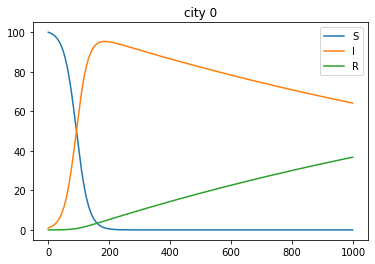

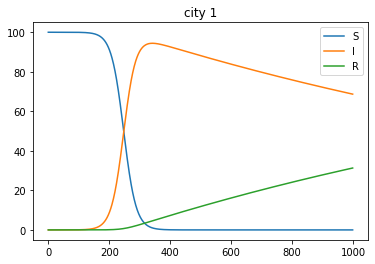

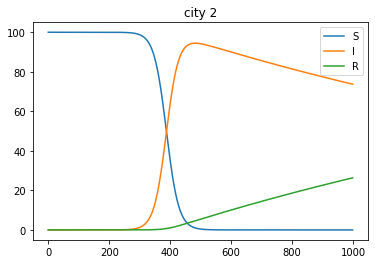

In [8]:
traj = s_t.detach().numpy()

for i in range(N):
    plt.title("city {}".format(i))
    plt.plot(traj[:, i, 0], label="S")
    plt.plot(traj[:, i, 1], label="I")
    plt.plot(traj[:, i, 2], label="R")
    plt.legend()
    plt.show()